In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/DATASET-balanced.csv
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/trump-to-Obama.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/margot-to-musk.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/linus-to-obama.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/taylor-to-trump.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/taylor-to-biden.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/ryan-to-trump.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/obama-to-musk.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/musk-to-trump.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/ryan-to-musk.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/trump-to-musk.wav
/kaggle/input/deep-voice-deepfake-

In [2]:
!pip install split-folders

In [3]:
import librosa as librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline
import librosa.display
from IPython.display import Audio
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import splitfolders
import skimage.io

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#Audio('/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/REAL/biden-original.wav')

/tmp/ipykernel_27/2711928892.py:3: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y, sr= sr, x_axis='s')


Örneklenen ses bir numpy dizisi (zaman serisi) olarak döndürülür ve  (19200096,)  örnek sayısına sahiptir
Rastgele seçilmiş 10 örnekleme sayısı:  [0.00900837 0.01079759 0.01080248 0.00981995 0.00911175 0.00834859
 0.00724009 0.00584963 0.00353851 0.00098223]


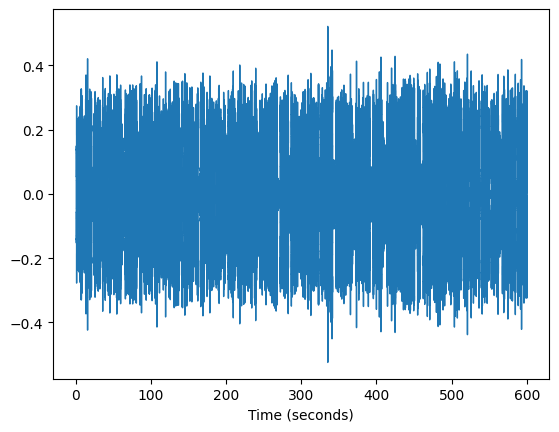

In [5]:
y, sr = librosa.load('/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/REAL/biden-original.wav', sr=32000)
# sr-> örnekleme frekansı 32000kHz 
librosa.display.waveshow(y, sr= sr, x_axis='s')
print("Örneklenen ses bir numpy dizisi (zaman serisi) olarak döndürülür ve ", y.shape, " örnek sayısına sahiptir")
#y.shape: Ses verisinin boyutunu (kaç örnek olduğunu) gösterir.
print("Rastgele seçilmiş 10 örnekleme sayısı: ", y[3000:3010])
#y[3000:3010]: Ses verisinin rastgele seçilmiş 10 örneğini yazdırır.

In [6]:
# FFT, ses verisini frekans bileşenlerine dönüştürmek için kullanılır.
n_fft=1024

# Pencereler arasındaki adım veya atlamayı belirler. Eğer adım, pencere uzunluğundan daha küçükse, pencereler birbirleriyle örtüşecektir.
hop_length=320

#  FFT/STFT için kullanılacak pencere türünü belirler. 'hann' (Hanning penceresi) kullanılmıştır.
window_type ='hann'

# librosa.stft: Librosa kütüphanesinin sağladığı kısa-zamanlı Fourier dönüşümünü (STFT) hesaplamak için kullanılır.
# Elde edilen STFT'nin kompleks büyüklüğünün karesi, spektrogramu oluşturur. Bu, frekans bileşenlerinin gücünü temsil eder.
spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type)) ** 2

print("Oluşturulan spektrogramın boyutu: ", spectrogram_librosa.shape)
print("Belirlediğimiz çerçeve boyutu, STFT için dikkate alınacak örnek sayısıdır. Bizim durumumuzda n_fft",n_fft, " örnektir.")
print("Çerçeve sayısı, örneklenen sinyalin toplam uzunluğuna, her çerçevedeki örnek sayısına ve atlama uzunluğuna bağlıdır.")

Oluşturulan spektrogramın boyutu:  (513, 60001)
Belirlediğimiz çerçeve boyutu, STFT için dikkate alınacak örnek sayısıdır. Bizim durumumuzda n_fft 1024  örnektir.
Çerçeve sayısı, örneklenen sinyalin toplam uzunluğuna, her çerçevedeki örnek sayısına ve atlama uzunluğuna bağlıdır.


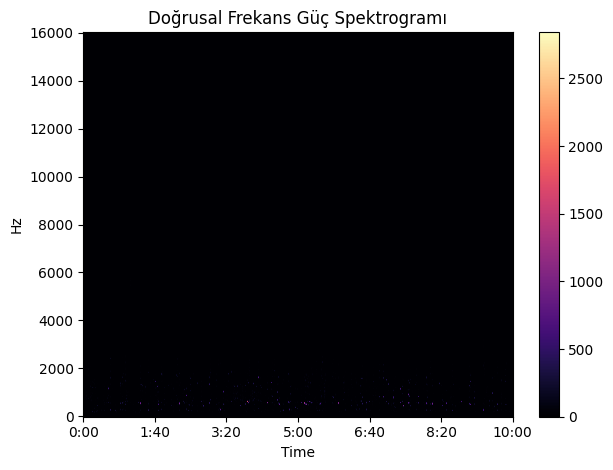

In [7]:
librosa.display.specshow(spectrogram_librosa, sr=sr, x_axis='time', y_axis='linear',hop_length=hop_length)
plt.title('Doğrusal Frekans Güç Spektrogramı')
plt.colorbar()
plt.tight_layout()
plt.show()

mel spectrogram boyutu:  (64, 60001)


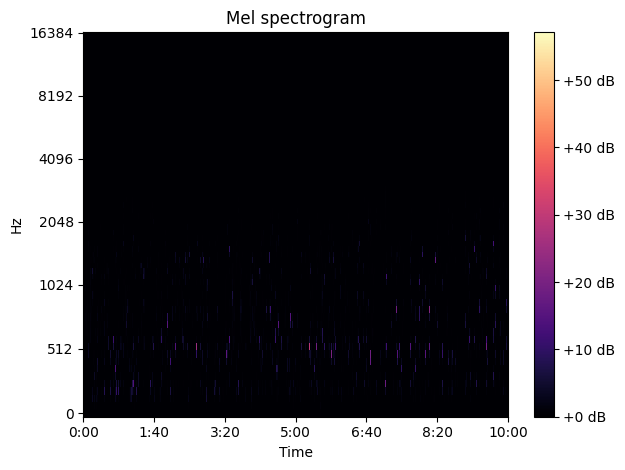

In [8]:
mel_bins = 64 # mel bands sayısı
fmin = 0
fmax= None
Mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels = mel_bins, power=2.0)
print("mel spectrogram boyutu: ", Mel_spectrogram.shape)

librosa.display.specshow(Mel_spectrogram, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

Log Mel spectrogram boyutu:  (64, 60001)


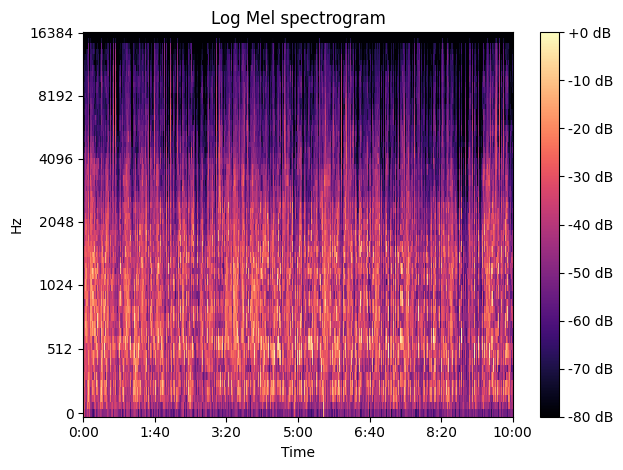

In [9]:
mel_spectrogram_db = librosa.power_to_db(Mel_spectrogram, ref=np.max)
print("Log Mel spectrogram boyutu: ", mel_spectrogram_db.shape)
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.show()

In [10]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(mel_spectrogram_db, out):

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mel_spectrogram_db , 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave(out, img)

# convert to PNG
out = 'out.png'
spectrogram_image(mel_spectrogram_db, out=out)
print('wrote file', out)

wrote file out.png


In [11]:
with open('logMel.npy', 'wb') as f:
    np.save(f,mel_spectrogram_db)
    
# Load the saved data as a confirmation  
with open('logMel.npy', 'rb') as f:
    a = np.load(f)
    print(a.shape)
    print(a)

####save as a.txt file
np.savetxt('logMel.out', mel_spectrogram_db, delimiter=',') # takes more space compared to saving as .npy

(64, 60001)
[[-48.799248 -50.562447 -51.80732  ... -51.975716 -47.951775 -52.654762]
 [-45.585266 -49.648354 -51.166855 ... -34.74274  -37.981995 -52.2566  ]
 [-45.490578 -48.19857  -46.784126 ... -28.998367 -38.344326 -50.41252 ]
 ...
 [-71.75806  -80.       -80.       ... -64.943275 -65.40945  -63.83509 ]
 [-72.50506  -80.       -80.       ... -77.783646 -80.       -80.      ]
 [-74.66216  -80.       -80.       ... -80.       -80.       -80.      ]]


mel filter bank boyutu:  (64, 513)


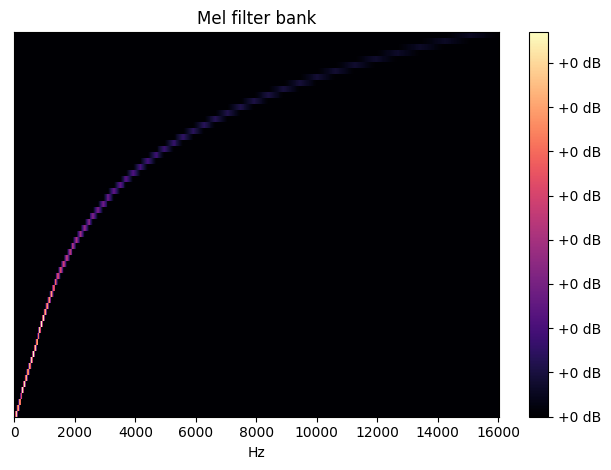

In [12]:
mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=mel_bins, fmin=0.0, fmax=None, htk=False, norm='slaney')
print("mel filter bank boyutu: ", mel_filter_bank.shape)
librosa.display.specshow(mel_filter_bank, sr=sr, x_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel filter bank')
plt.tight_layout()
plt.show()